In [79]:
import pandas as pd
import numpy as np
import os
import datetime as dt

In [45]:
os.getcwd()

'C:\\Users\\vasudha.tanniru\\Documents\\Python_Learning\\Datasets'

In [46]:
df = pd.read_csv('Project_1_sales_data\car_prices.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [47]:
# Check for missing values
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [8]:
# Check for duplicates
df.duplicated().sum()

0

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
correlation = df[['sellingprice','mmr']].corr()
print(correlation)


              sellingprice       mmr
sellingprice      1.000000  0.983635
mmr               0.983635  1.000000


In [48]:
#  Since the correlation between selling price and mmr is between 0.98 and 1 it is almost identicaly data .
# So dropping mmr
df = df.drop(columns = ['mmr'])
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [49]:
# Since transmission has many null values 65352. Dropping it
df = df.drop(columns = ['transmission'])
df.head()

,year,make,model,trim,body,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   vin           558833 non-null  object 
 6   state         558837 non-null  object 
 7   condition     547017 non-null  float64
 8   odometer      558743 non-null  float64
 9   color         558088 non-null  object 
 10  interior      558088 non-null  object 
 11  seller        558837 non-null  object 
 12  sellingprice  558825 non-null  float64
 13  saledate      558825 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 59.7+ MB


In [16]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
sellingprice       12
saledate           12
dtype: int64

In [51]:
df = df.drop(columns = ['trim','body'])

In [18]:
df.head()

,year,make,model,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2015,Kia,Sorento,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   vin           558833 non-null  object 
 4   state         558837 non-null  object 
 5   condition     547017 non-null  float64
 6   odometer      558743 non-null  float64
 7   color         558088 non-null  object 
 8   interior      558088 non-null  object 
 9   seller        558837 non-null  object 
 10  sellingprice  558825 non-null  float64
 11  saledate      558825 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 51.2+ MB


In [52]:
df.isnull().sum()

year                0
make            10301
model           10399
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
sellingprice       12
saledate           12
dtype: int64

In [53]:
df['make'].fillna(df['make'].mode()[0],inplace=True)

C:\Users\vasudha.tanniru\AppData\Local\Temp\ipykernel_6296\3454458302.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['make'].fillna(df['make'].mode()[0],inplace=True)


In [54]:
df['make'] = df['make'].fillna(df['make'].mode()[0])

In [55]:
df.isnull().sum()

year                0
make                0
model           10399
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
sellingprice       12
saledate           12
dtype: int64

In [56]:
df['model'] = df.groupby('make')['model'].transform(lambda x:x.mode()[0] if not x.mode().empty else "unknown")

In [26]:
df['condition'] = df['condition'].fillna(df['condition'].median())

C:\Users\vasudha.tanniru\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\vasudha.tanniru\AppData\Local\Temp\ipykernel_6296\825954645.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['condition'] = df['condition'].fillna(df['condition'].median())


In [27]:
df['condition'].dtype

dtype('float64')

In [28]:
df['condition'].unique()

array([nan])

In [57]:
df = df.drop(columns=['condition'])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          558837 non-null  object 
 2   model         558837 non-null  object 
 3   vin           558833 non-null  object 
 4   state         558837 non-null  object 
 5   odometer      558743 non-null  float64
 6   color         558088 non-null  object 
 7   interior      558088 non-null  object 
 8   seller        558837 non-null  object 
 9   sellingprice  558825 non-null  float64
 10  saledate      558825 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 46.9+ MB


In [59]:
df.isnull().sum()

year              0
make              0
model             0
vin               4
state             0
odometer         94
color           749
interior        749
seller            0
sellingprice     12
saledate         12
dtype: int64

In [60]:
# Fill missing numeric values with median
df['odometer'] = df['odometer'].fillna(df['odometer'].median())

# Fill missing categorical values with mode
for col in ['color', 'interior']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify missing values again
print(df.isnull().sum())


year             0
make             0
model            0
vin              4
state            0
odometer         0
color            0
interior         0
seller           0
sellingprice    12
saledate        12
dtype: int64


In [61]:
df=df.dropna(subset=['vin','sellingprice','saledate'])

In [62]:
df.isnull().sum()

year            0
make            0
model           0
vin             0
state           0
odometer        0
color           0
interior        0
seller          0
sellingprice    0
saledate        0
dtype: int64

In [63]:
df.head()

,year,make,model,vin,state,odometer,color,interior,seller,sellingprice,saledate
0,2015,Kia,Optima,5xyktca69fg566472,ca,16639.0,white,black,kia motors america inc,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Optima,5xyktca69fg561319,ca,9393.0,white,beige,kia motors america inc,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,wba3c1c51ek116351,ca,1331.0,gray,black,financial services remarketing (lease),30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,yv1612tb4f1310987,ca,14282.0,white,black,volvo na rep/world omni,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,3 Series,wba6b2c57ed129731,ca,2641.0,gray,black,financial services remarketing (lease),67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [64]:
df.duplicated().sum()

0

In [66]:
# Computing the age for cars, to see if older cars have less price
df["car_age"] = 2025-df["year"]

In [67]:
df.head()

,year,make,model,vin,state,odometer,color,interior,seller,sellingprice,saledate,car_age
0,2015,Kia,Optima,5xyktca69fg566472,ca,16639.0,white,black,kia motors america inc,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),10
1,2015,Kia,Optima,5xyktca69fg561319,ca,9393.0,white,beige,kia motors america inc,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),10
2,2014,BMW,3 Series,wba3c1c51ek116351,ca,1331.0,gray,black,financial services remarketing (lease),30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),11
3,2015,Volvo,S60,yv1612tb4f1310987,ca,14282.0,white,black,volvo na rep/world omni,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),10
4,2014,BMW,3 Series,wba6b2c57ed129731,ca,2641.0,gray,black,financial services remarketing (lease),67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),11


In [76]:
df["price_per_mile"] = df["sellingprice"]/df["odometer"]


In [77]:
df.head()

,year,make,model,vin,state,odometer,color,interior,seller,sellingprice,saledate,car_age,price_per_mile,car_category
0,2015,Kia,Optima,5xyktca69fg566472,ca,16639.0,white,black,kia motors america inc,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),10,1.292145,Mid-Age
1,2015,Kia,Optima,5xyktca69fg561319,ca,9393.0,white,beige,kia motors america inc,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),10,2.288939,Mid-Age
2,2014,BMW,3 Series,wba3c1c51ek116351,ca,1331.0,gray,black,financial services remarketing (lease),30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),11,22.539444,Old
3,2015,Volvo,S60,yv1612tb4f1310987,ca,14282.0,white,black,volvo na rep/world omni,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),10,1.943005,Mid-Age
4,2014,BMW,3 Series,wba6b2c57ed129731,ca,2641.0,gray,black,financial services remarketing (lease),67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),11,25.369178,Old


In [74]:
df["car_category"] = pd.cut(df['car_age'],bins = [0,3,10,100],labels = ['New','Mid-Age','Old'])

In [78]:
df.head()

,year,make,model,vin,state,odometer,color,interior,seller,sellingprice,saledate,car_age,price_per_mile,car_category
0,2015,Kia,Optima,5xyktca69fg566472,ca,16639.0,white,black,kia motors america inc,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),10,1.292145,Mid-Age
1,2015,Kia,Optima,5xyktca69fg561319,ca,9393.0,white,beige,kia motors america inc,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),10,2.288939,Mid-Age
2,2014,BMW,3 Series,wba3c1c51ek116351,ca,1331.0,gray,black,financial services remarketing (lease),30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),11,22.539444,Old
3,2015,Volvo,S60,yv1612tb4f1310987,ca,14282.0,white,black,volvo na rep/world omni,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),10,1.943005,Mid-Age
4,2014,BMW,3 Series,wba6b2c57ed129731,ca,2641.0,gray,black,financial services remarketing (lease),67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),11,25.369178,Old


In [81]:
df["saledate"].dtype

dtype('O')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558821 entries, 0 to 558836
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   year            558821 non-null  int64   
 1   make            558821 non-null  object  
 2   model           558821 non-null  object  
 3   vin             558821 non-null  object  
 4   state           558821 non-null  object  
 5   odometer        558821 non-null  float64 
 6   color           558821 non-null  object  
 7   interior        558821 non-null  object  
 8   seller          558821 non-null  object  
 9   sellingprice    558821 non-null  float64 
 10  saledate        558821 non-null  object  
 11  car_age         558821 non-null  int64   
 12  price_per_mile  558821 non-null  float64 
 13  car_category    558821 non-null  category
dtypes: category(1), float64(3), int64(2), object(8)
memory usage: 60.2+ MB


In [84]:
df["saledate"] = pd.to_datetime(df["saledate"],errors ="coerce",utc=True)

In [85]:
df['saledate'].dtype

datetime64[ns, UTC]

In [89]:
df["sale_year"] = df['saledate'].dt.year.fillna(0).astype(int)
df["sale_month"] = df["saledate"].dt.month.fillna(0).astype(int)

In [90]:
df.head()

,year,make,model,vin,state,odometer,color,interior,seller,sellingprice,saledate,car_age,price_per_mile,car_category,sale_year,sale_month
0,2015,Kia,Optima,5xyktca69fg566472,ca,16639.0,white,black,kia motors america inc,21500.0,2014-12-16 04:30:00+00:00,10,1.292145,Mid-Age,2014,12
1,2015,Kia,Optima,5xyktca69fg561319,ca,9393.0,white,beige,kia motors america inc,21500.0,2014-12-16 04:30:00+00:00,10,2.288939,Mid-Age,2014,12
2,2014,BMW,3 Series,wba3c1c51ek116351,ca,1331.0,gray,black,financial services remarketing (lease),30000.0,2015-01-14 20:30:00+00:00,11,22.539444,Old,2015,1
3,2015,Volvo,S60,yv1612tb4f1310987,ca,14282.0,white,black,volvo na rep/world omni,27750.0,2015-01-28 20:30:00+00:00,10,1.943005,Mid-Age,2015,1
4,2014,BMW,3 Series,wba6b2c57ed129731,ca,2641.0,gray,black,financial services remarketing (lease),67000.0,2014-12-18 04:30:00+00:00,11,25.369178,Old,2014,12


In [91]:
df["sale_day"] = df["saledate"].dt.day.fillna(0).astype(int)

In [92]:
df.head()

,year,make,model,vin,state,odometer,color,interior,seller,sellingprice,saledate,car_age,price_per_mile,car_category,sale_year,sale_month,sale_day
0,2015,Kia,Optima,5xyktca69fg566472,ca,16639.0,white,black,kia motors america inc,21500.0,2014-12-16 04:30:00+00:00,10,1.292145,Mid-Age,2014,12,16
1,2015,Kia,Optima,5xyktca69fg561319,ca,9393.0,white,beige,kia motors america inc,21500.0,2014-12-16 04:30:00+00:00,10,2.288939,Mid-Age,2014,12,16
2,2014,BMW,3 Series,wba3c1c51ek116351,ca,1331.0,gray,black,financial services remarketing (lease),30000.0,2015-01-14 20:30:00+00:00,11,22.539444,Old,2015,1,14
3,2015,Volvo,S60,yv1612tb4f1310987,ca,14282.0,white,black,volvo na rep/world omni,27750.0,2015-01-28 20:30:00+00:00,10,1.943005,Mid-Age,2015,1,28
4,2014,BMW,3 Series,wba6b2c57ed129731,ca,2641.0,gray,black,financial services remarketing (lease),67000.0,2014-12-18 04:30:00+00:00,11,25.369178,Old,2014,12,18


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558821 entries, 0 to 558836
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   year            558821 non-null  int64              
 1   make            558821 non-null  object             
 2   model           558821 non-null  object             
 3   vin             558821 non-null  object             
 4   state           558821 non-null  object             
 5   odometer        558821 non-null  float64            
 6   color           558821 non-null  object             
 7   interior        558821 non-null  object             
 8   seller          558821 non-null  object             
 9   sellingprice    558821 non-null  float64            
 10  saledate        558799 non-null  datetime64[ns, UTC]
 11  car_age         558821 non-null  int64              
 12  price_per_mile  558821 non-null  float64            
 13  car_category    558

In [95]:
luxury_brands = ['Mercedes-Benz', 'BMW', 'Audi', 'Lexus', 'Porsche', 'Tesla']

In [96]:
df["luxury"] = df["make"].apply(lambda x: 'Luxury' if x in luxury_brands else 'Regular')

In [97]:
df.head()

,year,make,model,vin,state,odometer,color,interior,seller,sellingprice,saledate,car_age,price_per_mile,car_category,sale_year,sale_month,sale_day,luxury
0,2015,Kia,Optima,5xyktca69fg566472,ca,16639.0,white,black,kia motors america inc,21500.0,2014-12-16 04:30:00+00:00,10,1.292145,Mid-Age,2014,12,16,Regular
1,2015,Kia,Optima,5xyktca69fg561319,ca,9393.0,white,beige,kia motors america inc,21500.0,2014-12-16 04:30:00+00:00,10,2.288939,Mid-Age,2014,12,16,Regular
2,2014,BMW,3 Series,wba3c1c51ek116351,ca,1331.0,gray,black,financial services remarketing (lease),30000.0,2015-01-14 20:30:00+00:00,11,22.539444,Old,2015,1,14,Luxury
3,2015,Volvo,S60,yv1612tb4f1310987,ca,14282.0,white,black,volvo na rep/world omni,27750.0,2015-01-28 20:30:00+00:00,10,1.943005,Mid-Age,2015,1,28,Regular
4,2014,BMW,3 Series,wba6b2c57ed129731,ca,2641.0,gray,black,financial services remarketing (lease),67000.0,2014-12-18 04:30:00+00:00,11,25.369178,Old,2014,12,18,Luxury


In [105]:
df['depreciation_rate'] = (df['sellingprice'] / (df['car_age'] + 1)).round(2)


In [106]:
df.head()

,year,make,model,vin,state,odometer,color,interior,seller,sellingprice,saledate,car_age,price_per_mile,car_category,sale_year,sale_month,sale_day,luxury,depreciation_rate
0,2015,Kia,Optima,5xyktca69fg566472,ca,16639.0,white,black,kia motors america inc,21500.0,2014-12-16 04:30:00+00:00,10,1.292145,Mid-Age,2014,12,16,Regular,1954.55
1,2015,Kia,Optima,5xyktca69fg561319,ca,9393.0,white,beige,kia motors america inc,21500.0,2014-12-16 04:30:00+00:00,10,2.288939,Mid-Age,2014,12,16,Regular,1954.55
2,2014,BMW,3 Series,wba3c1c51ek116351,ca,1331.0,gray,black,financial services remarketing (lease),30000.0,2015-01-14 20:30:00+00:00,11,22.539444,Old,2015,1,14,Luxury,2500.00
3,2015,Volvo,S60,yv1612tb4f1310987,ca,14282.0,white,black,volvo na rep/world omni,27750.0,2015-01-28 20:30:00+00:00,10,1.943005,Mid-Age,2015,1,28,Regular,2522.73
4,2014,BMW,3 Series,wba6b2c57ed129731,ca,2641.0,gray,black,financial services remarketing (lease),67000.0,2014-12-18 04:30:00+00:00,11,25.369178,Old,2014,12,18,Luxury,5583.33


In [107]:
df['mileage_category'] = pd.cut(df["odometer"],bins=[0,25000,75000,150000,300000],labels=['Low','Medium','High','Very High'])

In [108]:
df.head()

,year,make,model,vin,state,odometer,color,interior,seller,sellingprice,saledate,car_age,price_per_mile,car_category,sale_year,sale_month,sale_day,luxury,depreciation_rate,mileage_category
0,2015,Kia,Optima,5xyktca69fg566472,ca,16639.0,white,black,kia motors america inc,21500.0,2014-12-16 04:30:00+00:00,10,1.292145,Mid-Age,2014,12,16,Regular,1954.55,Low
1,2015,Kia,Optima,5xyktca69fg561319,ca,9393.0,white,beige,kia motors america inc,21500.0,2014-12-16 04:30:00+00:00,10,2.288939,Mid-Age,2014,12,16,Regular,1954.55,Low
2,2014,BMW,3 Series,wba3c1c51ek116351,ca,1331.0,gray,black,financial services remarketing (lease),30000.0,2015-01-14 20:30:00+00:00,11,22.539444,Old,2015,1,14,Luxury,2500.00,Low
3,2015,Volvo,S60,yv1612tb4f1310987,ca,14282.0,white,black,volvo na rep/world omni,27750.0,2015-01-28 20:30:00+00:00,10,1.943005,Mid-Age,2015,1,28,Regular,2522.73,Low
4,2014,BMW,3 Series,wba6b2c57ed129731,ca,2641.0,gray,black,financial services remarketing (lease),67000.0,2014-12-18 04:30:00+00:00,11,25.369178,Old,2014,12,18,Luxury,5583.33,Low


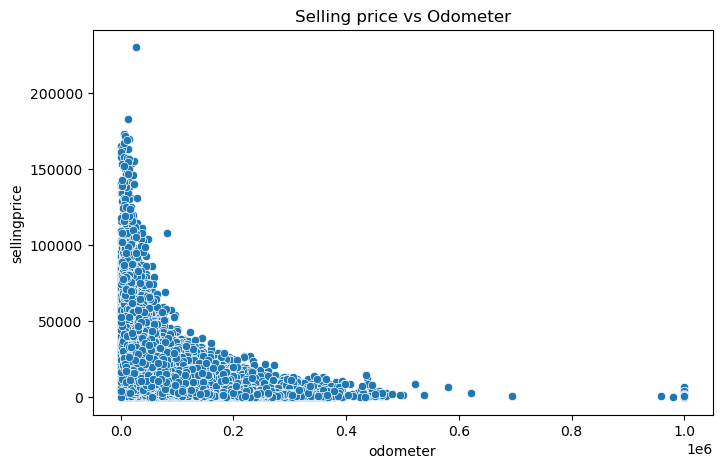

In [109]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['odometer'],y=df['sellingprice'])
plt.title("Selling price vs Odometer")
plt.show()

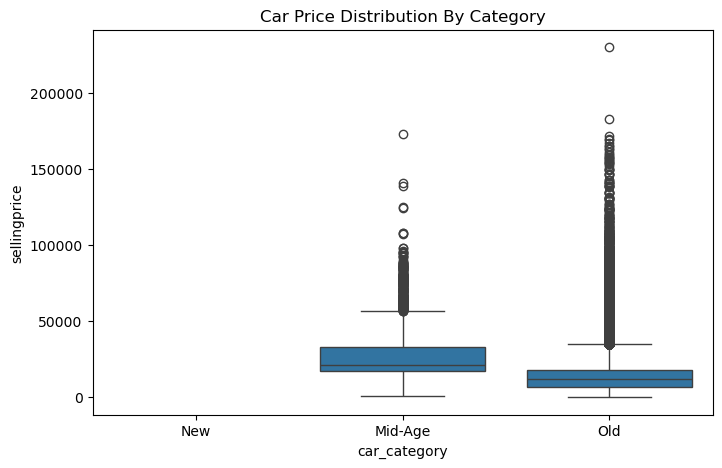

In [110]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['car_category'],y=df['sellingprice'])
plt.title("Car Price Distribution By Category")
plt.show()

In [112]:
df.to_csv("Project_1_sales_data\car_prices_final.csv",index=False)